# Dataset Description: Oversize & Overweight Truck Enforcement (USA)
> **This dataset contains annual state-wise records related to commercial vehicle size and weight enforcement activities across the United States. The data includes information on the number and types of vehicles weighed, counts of oversize and overweight violations, and the permits issued for both divisible and non-divisible loads.**

**Key Columns:**

- **year**  –  The reporting year for the data (e.g., 2022, 2023).
- **State**  -  U.S. state where the data was collected (e.g., California, Texas).
- **Vehicles Weighed (Fixed platform Scale)**  -  Number of vehicles weighed using fixed platform scales (usually permanent installations on highways).
- **Vehicles Weighed (WIM Scale)**  -  Number of vehicles weighed using Weigh-in-Motion (WIM) scales — automatic systems that weigh vehicles as                                                they drive over them.
- **Vehicles Weighed (Portable Scale)**  -  Vehicles weighed using portable weighing systems, usually mobile for enforcement checks.
- **Vehicles Weighed (Semi-portable Scale)**  -  Weighing using semi-portable scales (intermediate between fixed and portable).
- **oversize_violation_current_year**  -  Number of oversize (length/width/height) violations reported in the year.
- **overweight_violation_current_year**  -  Number of overweight (weight limit) violations in the current year.
- **non_divisible_trip_permits**  -  Permits issued for non-divisible loads (e.g., large machinery) for single trips.
- **non_divisible_annual_permits**  -  Permits for non-divisible loads valid for multiple trips or time period (usually annual).
- **divisible_trip_permits**  -  Permits for divisible loads (e.g., grain, gravel) for single trips. These are less commonly issued.
- **divisible_annual_permits**  -  Annual permits for divisible loads (if allowed under state rules).

# 1. Initial Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Truck_Size_and_Weight_Enforcement_Data.csv")
df.head()

,year,State,Vehicles Weighed (Fixed platform Scale),Vehicles Weighed (WIM Scale),Vehicles Weighed (Portable Scale),Vehicles Weighed (Semi-portable Scale),oversize_violation_current_year,overweight_violation_current_year,non_divisible_trip_permits,non_divisible_annual_permits,divisible_trip_permits,divisible_annual_permits
0,2024,AK,68908.0,1666041.0,250.0,0.0,134.0,1298.0,4563,285.0,0.0,0.0
1,2024,AL,885184.0,623281.0,85236.0,0.0,257.0,8800.0,152174,11431.0,0.0,0.0
2,2024,AR,14684.0,3244662.0,7276.0,199.0,1356.0,8323.0,164477,121.0,3519.0,556.0
3,2024,AZ,1585001.0,11787613.0,94.0,132.0,17.0,2071.0,105960,2259.0,9.0,1500.0
4,2024,CA,6486458.0,13008303.0,471.0,0.0,8898.0,12301.0,138179,19976.0,0.0,0.0


In [3]:
df.columns

Index(['year', 'State', 'Vehicles Weighed (Fixed platform Scale)',
       'Vehicles Weighed (WIM Scale)', 'Vehicles Weighed (Portable Scale)',
       'Vehicles Weighed (Semi-portable Scale)',
       'oversize_violation_current_year', 'overweight_violation_current_year',
       'non_divisible_trip_permits', 'non_divisible_annual_permits',
       'divisible_trip_permits', 'divisible_annual_permits'],
      dtype='object')

## Descriptive Statistics

In [4]:
df.describe()

,year,Vehicles Weighed (Fixed platform Scale),Vehicles Weighed (WIM Scale),Vehicles Weighed (Portable Scale),Vehicles Weighed (Semi-portable Scale),oversize_violation_current_year,overweight_violation_current_year,non_divisible_trip_permits,non_divisible_annual_permits,divisible_trip_permits,divisible_annual_permits
count,310.000000,3.060000e+02,3.070000e+02,309.000000,296.000000,307.000000,308.000000,310.000000,304.000000,294.000000,302.000000
mean,2021.512903,1.223063e+06,5.789319e+06,7446.194175,5310.807432,833.201954,5807.340909,90098.796774,8763.302632,13455.064626,10655.235099
std,1.708013,2.375469e+06,1.192169e+07,14446.735345,42081.692252,1933.534026,7767.921977,76185.791419,13571.387375,43550.904085,31327.802149
min,2019.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,3.707400e+04,3.226760e+05,571.000000,0.000000,60.000000,780.500000,32016.500000,1788.250000,0.000000,0.000000
50%,2022.000000,3.802575e+05,1.790891e+06,2303.000000,0.000000,343.000000,3403.000000,81250.000000,4116.000000,0.000000,1602.500000
75%,2023.000000,1.301726e+06,5.326462e+06,7488.000000,795.500000,733.500000,7120.250000,124821.250000,10973.000000,1111.500000,9178.500000
max,2024.000000,2.383381e+07,8.298769e+07,86735.000000,707729.000000,12412.000000,46349.000000,373097.000000,99113.000000,253489.000000,267809.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   year                                     310 non-null    int64  
 1   State                                    310 non-null    object 
 2   Vehicles Weighed (Fixed platform Scale)  306 non-null    float64
 3   Vehicles Weighed (WIM Scale)             307 non-null    float64
 4   Vehicles Weighed (Portable Scale)        309 non-null    float64
 5   Vehicles Weighed (Semi-portable Scale)   296 non-null    float64
 6   oversize_violation_current_year          307 non-null    float64
 7   overweight_violation_current_year        308 non-null    float64
 8   non_divisible_trip_permits               310 non-null    int64  
 9   non_divisible_annual_permits             304 non-null    float64
 10  divisible_trip_permits                   294 non-n

# 2. Data Cleaning & Preparation
> **Since all data neat and clean we don't need to do this Step**

# 3. Descriptive Statistics

### 1. State-wise Summary
>  **Total records and totals per state**

In [10]:
# Count of records per state
state_counts = df['State'].value_counts()

# Sum of key metrics per state
state_summary = df.groupby('State')[[
    'oversize_violation_current_year',
    'overweight_violation_current_year',
    'non_divisible_trip_permits',
    'non_divisible_annual_permits',
    'divisible_trip_permits',
    'divisible_annual_permits'
]].sum().sort_values(by='overweight_violation_current_year', ascending=False)

Number of records per state:


In [13]:
print("Number of records per state:")
state_counts.head()

Number of records per state:


State
AK    6
AL    6
AR    6
AZ    6
CA    6
Name: count, dtype: int64

In [9]:
state_summary.head()

,oversize_violation_current_year,overweight_violation_current_year,non_divisible_trip_permits,non_divisible_annual_permits,divisible_trip_permits,divisible_annual_permits
State,,,,,,
FL,60952.0,224406.0,438595,146713.0,909.0,47573.0
VA,1070.0,170312.0,405702,85765.0,0.0,0.0
OK,5735.0,131341.0,417125,18186.0,22927.0,11498.0
GA,445.0,111095.0,1034367,157501.0,493.0,981.0
CA,55290.0,93210.0,886326,110588.0,0.0,208.0


>  **Visual Summary**

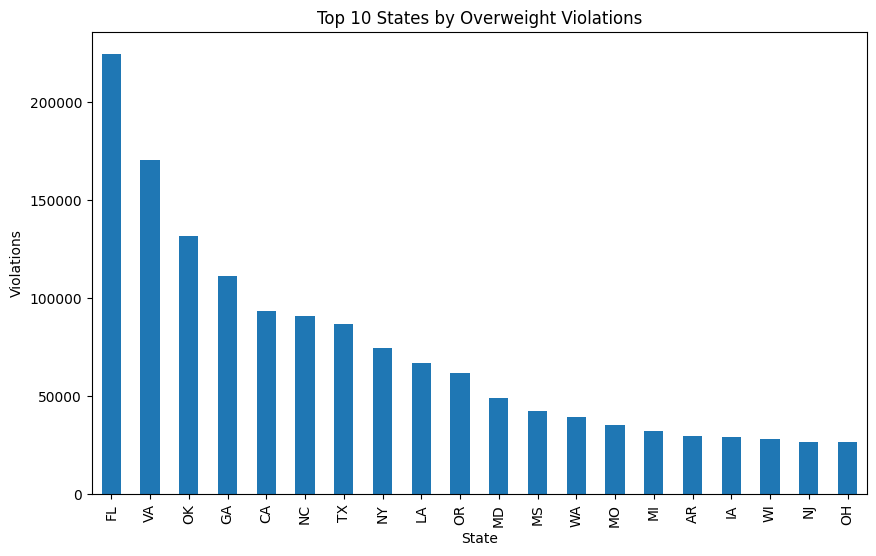

In [15]:
# Top 10 states by overweight violations
state_summary['overweight_violation_current_year'].head(20).plot(kind='bar', figsize=(10,6), title='Top 10 States by Overweight Violations')
plt.ylabel('Violations')
plt.show()

### 2. Year-wise Summary

> **Totals per year**

In [16]:
year_summary = df.groupby('year')[[
    'oversize_violation_current_year',
    'overweight_violation_current_year',
    'non_divisible_trip_permits',
    'divisible_annual_permits'
]].sum()

In [17]:
print("Year-wise totals:")
year_summary

Year-wise totals:


,oversize_violation_current_year,overweight_violation_current_year,non_divisible_trip_permits,divisible_annual_permits
year,,,,
2019,55776.0,374293.0,4756424,489912.0
2020,37574.0,265907.0,4493708,444852.0
2021,39830.0,300680.0,4561392,480539.0
2022,39279.0,293475.0,4515519,506959.0
2023,43216.0,276959.0,4783272,775266.0
2024,40118.0,277347.0,4820312,520353.0


> **Plotting Yearly Trends**

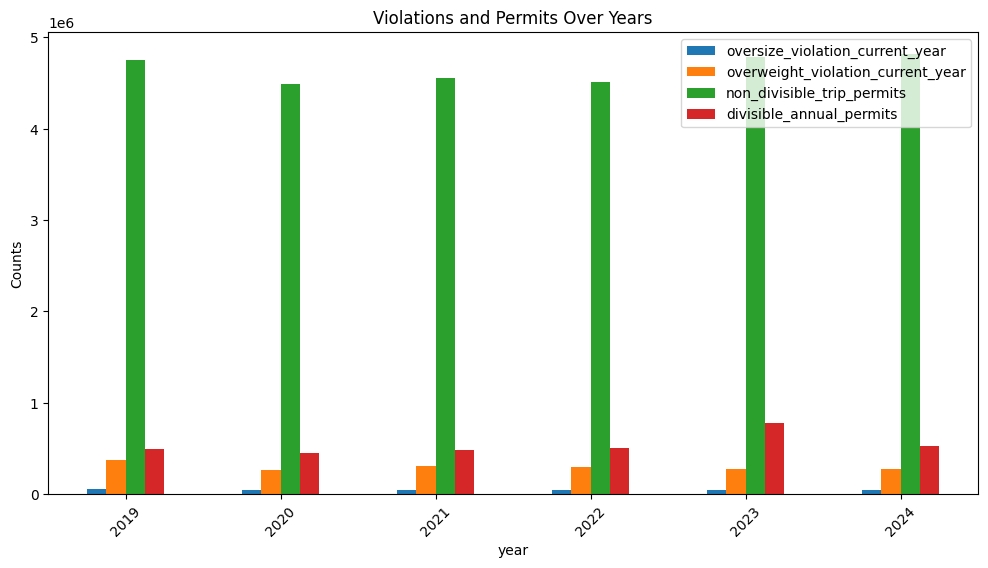

In [18]:
year_summary.plot(kind='bar', figsize=(12,6), title='Violations and Permits Over Years')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

> **3. Combined Pivot Table (State x Year)**

In [22]:
pivot_weight = df.pivot_table(
    index='State', 
    columns='year', 
    values='overweight_violation_current_year', 
    aggfunc='sum',
    fill_value=0
)

In [26]:
pivot_size = df.pivot_table(
    index='State', 
    columns='year', 
    values='oversize_violation_current_year', 
    aggfunc='sum',
    fill_value=0
)

In [27]:
print("State vs Year: Overweight Violations")
pivot_weight.head()

State vs Year: Overweight Violations


year,2019,2020,2021,2022,2023,2024
State,,,,,,
AK,675.0,592.0,685.0,938.0,1073.0,1298.0
AL,245.0,201.0,296.0,1165.0,3814.0,8800.0
AR,5791.0,4733.0,1764.0,4254.0,4687.0,8323.0
AZ,1039.0,771.0,1512.0,1691.0,2100.0,2071.0
CA,19592.0,17793.0,14922.0,15345.0,13257.0,12301.0


In [28]:
print("State vs Year: Over_size Violations")
pivot_size.head()

State vs Year: Over_size Violations


year,2019,2020,2021,2022,2023,2024
State,,,,,,
AK,38.0,53.0,54.0,63.0,84.0,134.0
AL,883.0,645.0,701.0,1435.0,1693.0,257.0
AR,1391.0,1324.0,1026.0,909.0,1353.0,1356.0
AZ,36.0,36.0,52.0,55.0,22.0,17.0
CA,9331.0,9867.0,8806.0,9357.0,9031.0,8898.0


In [21]:
df.head()

,year,State,Vehicles Weighed (Fixed platform Scale),Vehicles Weighed (WIM Scale),Vehicles Weighed (Portable Scale),Vehicles Weighed (Semi-portable Scale),oversize_violation_current_year,overweight_violation_current_year,non_divisible_trip_permits,non_divisible_annual_permits,divisible_trip_permits,divisible_annual_permits
0,2024,AK,68908.0,1666041.0,250.0,0.0,134.0,1298.0,4563,285.0,0.0,0.0
1,2024,AL,885184.0,623281.0,85236.0,0.0,257.0,8800.0,152174,11431.0,0.0,0.0
2,2024,AR,14684.0,3244662.0,7276.0,199.0,1356.0,8323.0,164477,121.0,3519.0,556.0
3,2024,AZ,1585001.0,11787613.0,94.0,132.0,17.0,2071.0,105960,2259.0,9.0,1500.0
4,2024,CA,6486458.0,13008303.0,471.0,0.0,8898.0,12301.0,138179,19976.0,0.0,0.0


> **1. Line Plot: Trend Over Years for Selected States**

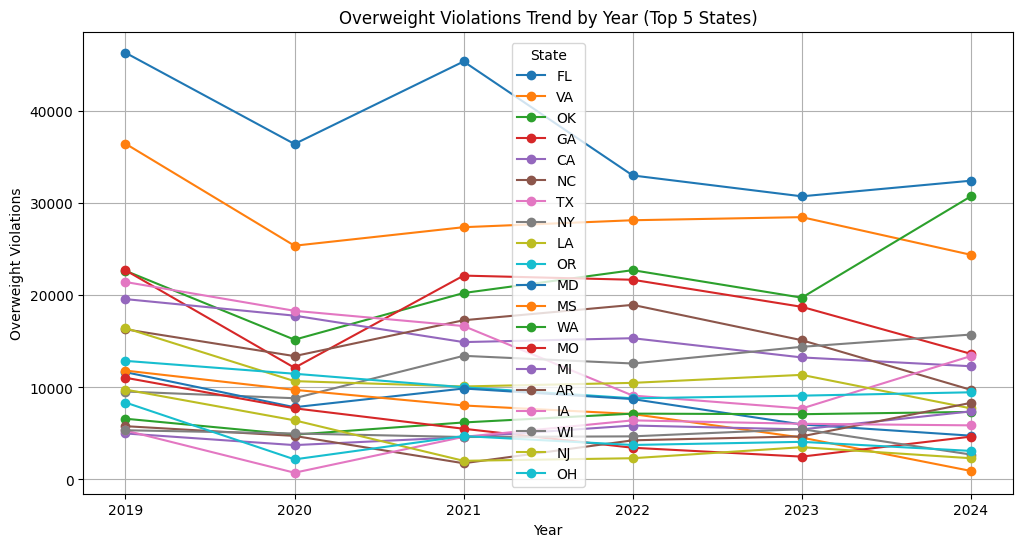

In [34]:
# Select the top 5 states with the highest total weight violations
top_states = pivot_weight.sum(axis=1).sort_values(ascending=False).head(20).index

# Plot the trend over the years for these states
pivot_weight.loc[top_states].T.plot(marker='o', figsize=(12,6), title='Overweight Violations Trend by Year (Top 5 States)')
plt.xlabel("Year")
plt.ylabel("Overweight Violations")
plt.grid(True)
plt.show()

- **FLorida** has highest number of Voilations on **Overweight** but in declining rate, with **highest in 2019** with more then **45,000**
- **2nd** rand is **Virginia** with more then **35,000 tons rate**.

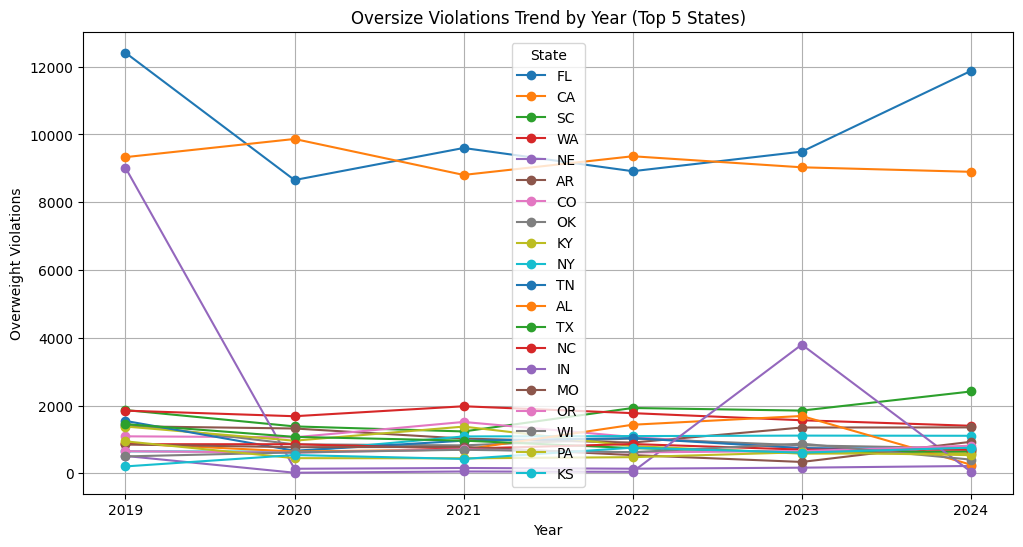

In [39]:
# Select top 5 states with highest total size violations
top_states = pivot_size.sum(axis=1).sort_values(ascending=False).head(20).index

# Plot the trend over the years for these states
pivot_size.loc[top_states].T.plot(marker='o', figsize=(12,6), title='Oversize Violations Trend by Year (Top 5 States)')
plt.xlabel("Year")
plt.ylabel("Overweight Violations")
plt.grid(True)
plt.show()


- Even here the **Florida** and **Virginia** Rank on the Top of list compare to other States.

> **2. Heatmap of State vs Year**

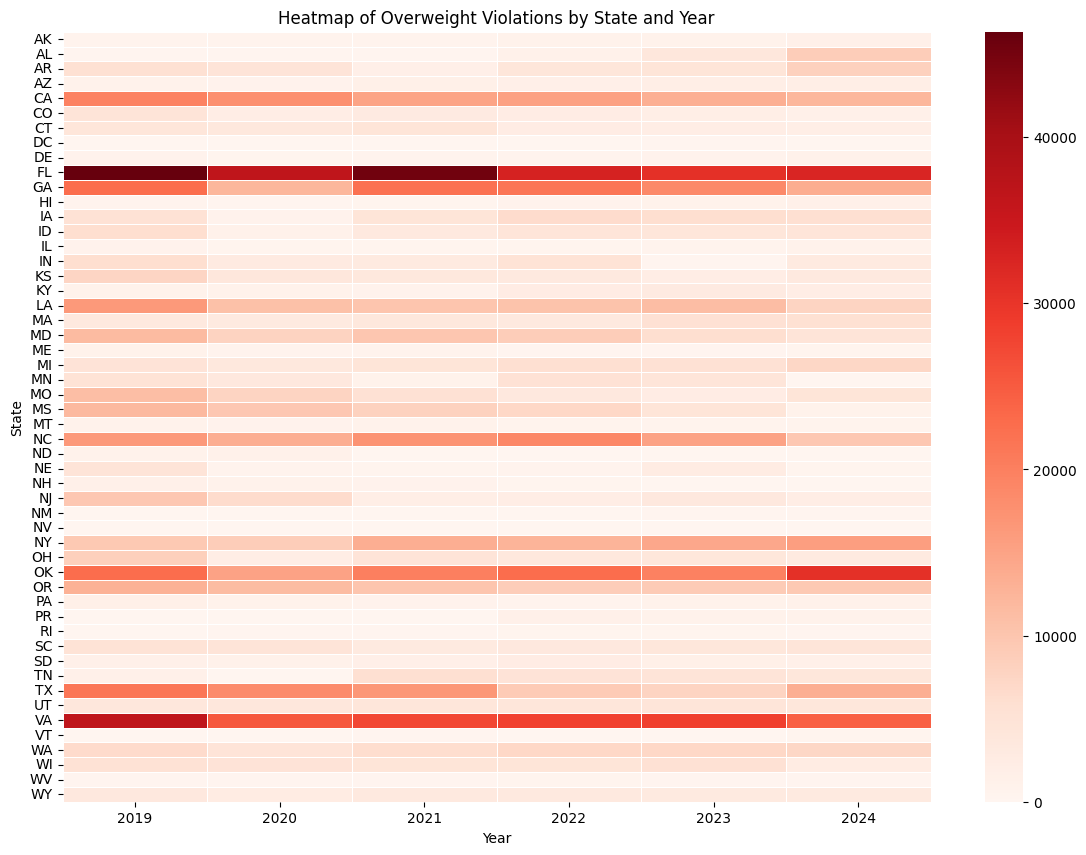

In [62]:
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_weight, cmap="Reds", linewidths=0.5)
plt.title('Heatmap of Overweight Violations by State and Year')
plt.xlabel("Year")
plt.ylabel("State")
plt.show()

- **Florida, Georgia and Virginia** each year are highly related in terms of Year On Year Overweight case.

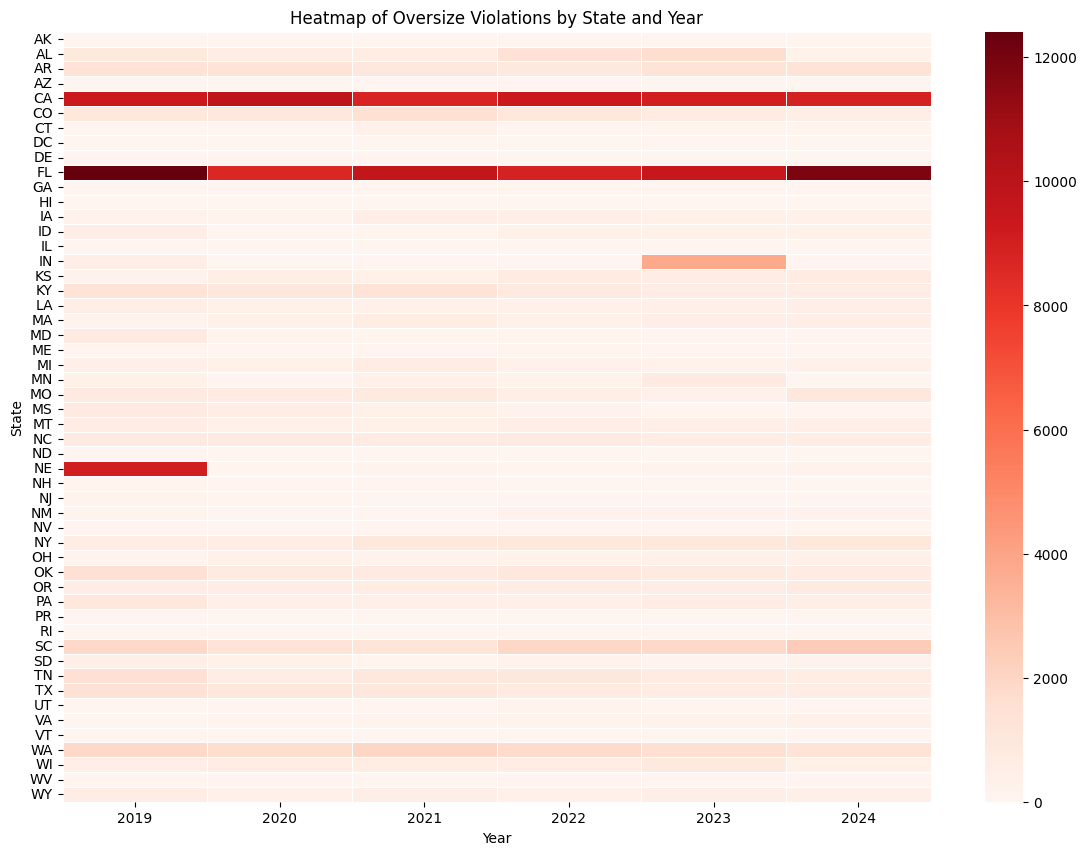

In [38]:
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_size, cmap="Reds", linewidths=0.5)
plt.title('Heatmap of Oversize Violations by State and Year')
plt.xlabel("Year")
plt.ylabel("State")
plt.show()

- Here also **California, Florida** are on highest case of oversize vailation case.
- But State like **Nebraska** shows only high oversize cases in **2019 Year.**

# 4. Time-Based Trend Analysis

> 1. **Group by Year**

In [40]:
# Grouping violations by year
yearly_violations = df.groupby('year')[[
    'oversize_violation_current_year',
    'overweight_violation_current_year'
]].sum()

print(yearly_violations)

      oversize_violation_current_year  overweight_violation_current_year
year                                                                    
2019                          55776.0                           374293.0
2020                          37574.0                           265907.0
2021                          39830.0                           300680.0
2022                          39279.0                           293475.0
2023                          43216.0                           276959.0
2024                          40118.0                           277347.0


> **2. Line Plot Comparison**

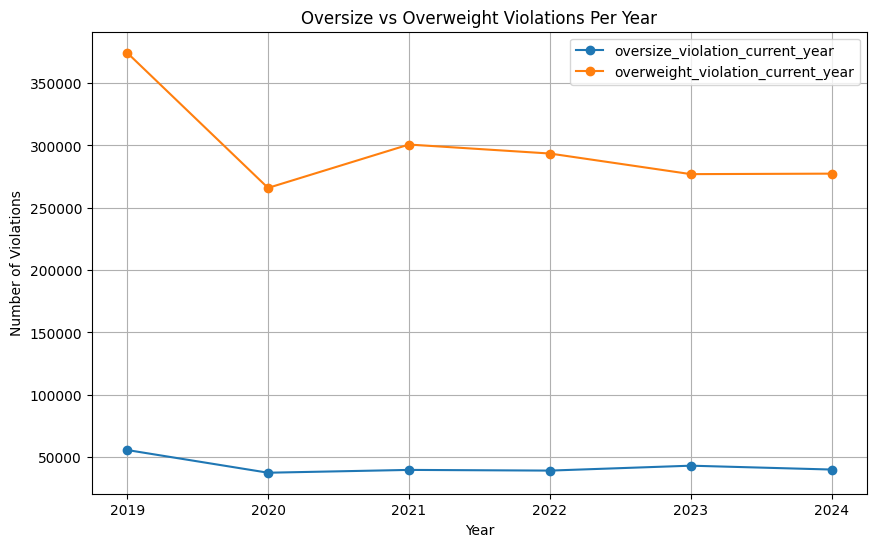

In [41]:
# Plotting the trend
yearly_violations.plot(kind='line', marker='o', figsize=(10,6), title='Oversize vs Overweight Violations Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Violations')
plt.grid(True)
plt.show()

> **3. Bar Plot (Side-by-side)**

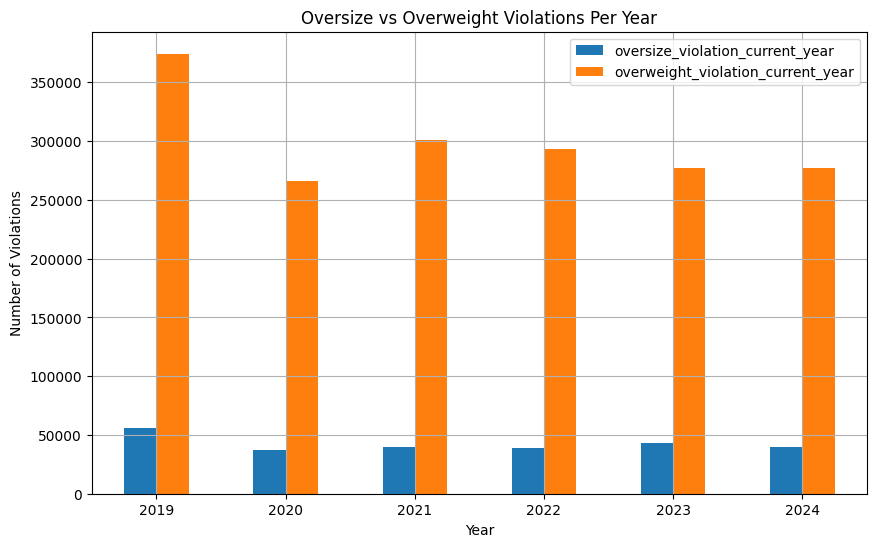

In [42]:
# Plot as side-by-side bars
yearly_violations.plot(kind='bar', figsize=(10,6), title='Oversize vs Overweight Violations Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Violations')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

- The **Oversize record** are much more lower case then **Overweght records** each year.

> **4. Percentage Change Year-over-Year (Optional)**

In [63]:
pct_change = yearly_violations.pct_change() * 100

In [64]:
print("Year-over-Year Percentage Change:")
pct_change

Year-over-Year Percentage Change:


,oversize_violation_current_year,overweight_violation_current_year
year,,
2019,NaN,NaN
2020,-32.634108,-28.957528
2021,6.004152,13.077128
2022,-1.383379,-2.396235
2023,10.023168,-5.627737
2024,-7.168641,0.140093


> **Bar Plot: YoY % Change**

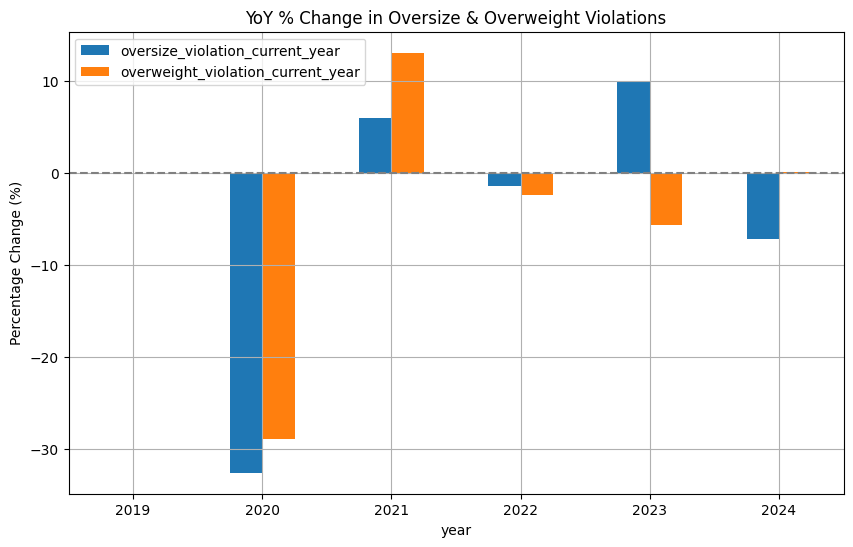

In [46]:
# Plot percentage change as bar chart
ax = pct_change.plot(kind='bar', figsize=(10,6), title='YoY % Change in Oversize & Overweight Violations')
ax.set_ylabel('Percentage Change (%)')
ax.axhline(0, color='gray', linestyle='--')  # horizontal line at 0
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

- There was sharp decrease in record in year 2020 for both the overweight and oversize records, this reason can be due to covid 19 pandamic.
- There was more then **30% case decrease in year 2020 for oversize voilation records.**
- There was more then **28% case decrease in year 2020 for oversize voilation records.**

## Total Permits Over Years

> **1. Group & Summarize Permits by Year**

In [47]:
# Group by year and sum permit columns
yearly_permits = df.groupby('year')[[
    'non_divisible_trip_permits',
    'non_divisible_annual_permits',
    'divisible_trip_permits',
    'divisible_annual_permits'
]].sum()

# Add total column
yearly_permits['total_permits'] = yearly_permits.sum(axis=1)

In [48]:
# View the summary
yearly_permits

,non_divisible_trip_permits,non_divisible_annual_permits,divisible_trip_permits,divisible_annual_permits,total_permits
year,,,,,
2019,4756424,353746.0,667693.0,489912.0,6267775.0
2020,4493708,396342.0,668573.0,444852.0,6003475.0
2021,4561392,411021.0,683318.0,480539.0,6136270.0
2022,4515519,471174.0,603917.0,506959.0,6097569.0
2023,4783272,556578.0,619096.0,775266.0,6734212.0
2024,4820312,475183.0,713192.0,520353.0,6529040.0


> **Bar Plot: Total Permits per Year**

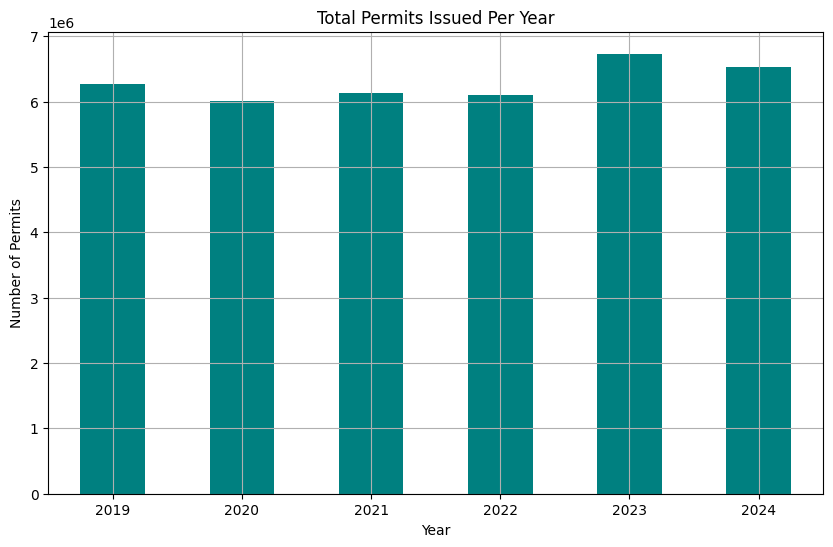

In [49]:
# Plot total permits
yearly_permits['total_permits'].plot(
    kind='bar', 
    figsize=(10,6), 
    title='Total Permits Issued Per Year',
    color='teal'
)
plt.ylabel('Number of Permits')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

> **3. Stacked Bar Chart: Permit Types**

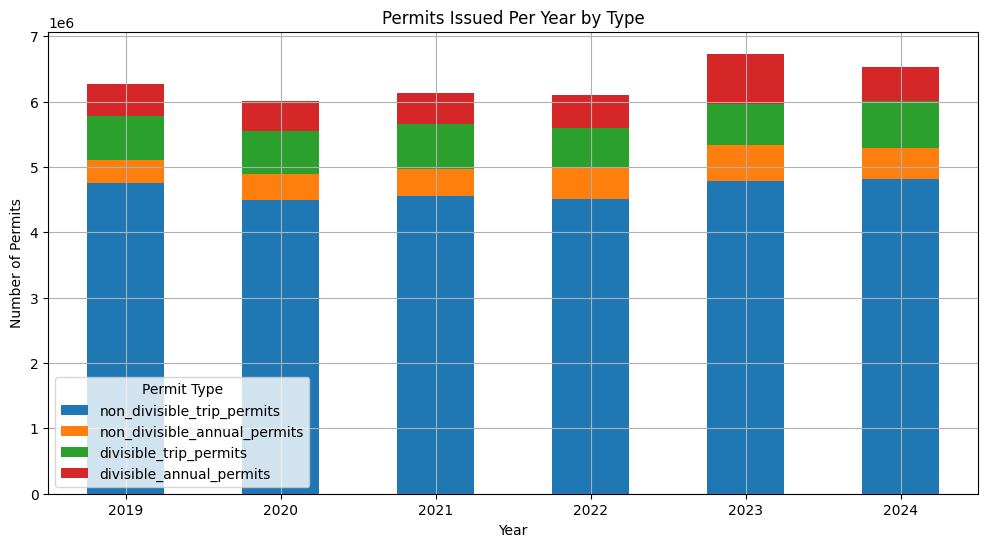

In [50]:
# Stacked bar for breakdown by type
yearly_permits.drop(columns='total_permits').plot(
    kind='bar', 
    stacked=True, 
    figsize=(12,6), 
    title='Permits Issued Per Year by Type'
)
plt.ylabel('Number of Permits')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.legend(title='Permit Type')
plt.grid(True)
plt.show()

- More then **90% permit of records** were given to **non-divisible_trip_permits**.
- There was slight increase in permit given to **divisible_annual_permits** in year 2023.

## Vehicles Weighed Over Time (by Scale Type)

In [51]:
scale_cols = [
    'Vehicles Weighed (Fixed platform Scale)',
    'Vehicles Weighed (WIM Scale)',
    'Vehicles Weighed (Portable Scale)',
    'Vehicles Weighed (Semi-portable Scale)'
]

# Group by year and sum all scale types
yearly_scales = df.groupby('year')[scale_cols].sum()
yearly_scales

,Vehicles Weighed (Fixed platform Scale),Vehicles Weighed (WIM Scale),Vehicles Weighed (Portable Scale),Vehicles Weighed (Semi-portable Scale)
year,,,,
2019,57912712.0,176930530.0,516631.0,153909.0
2020,72023918.0,322024662.0,338867.0,128907.0
2021,57345324.0,336963712.0,370479.0,136691.0
2022,65534341.0,335390835.0,380428.0,150857.0
2023,62126510.0,351874615.0,350017.0,839301.0
2024,59314615.0,254136436.0,344452.0,162334.0


> 2. **Line Plot: Trend by Scale Type**

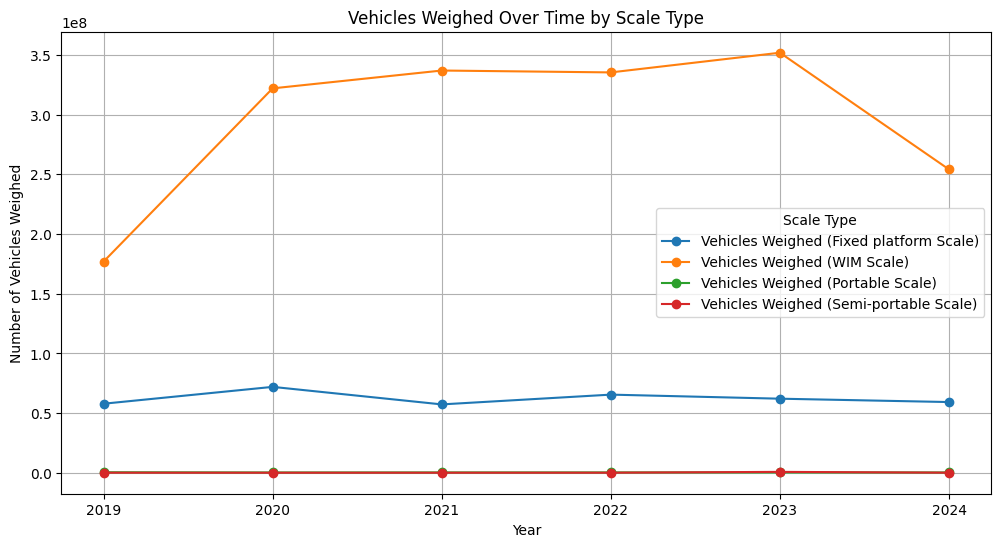

In [53]:
# Plotting line chart for each scale type
yearly_scales.plot(
    kind='line',
    marker='o',
    figsize=(12,6),
    title='Vehicles Weighed Over Time by Scale Type'
)
plt.xlabel('Year')
plt.ylabel('Number of Vehicles Weighed')
plt.grid(True)
plt.legend(title='Scale Type')
plt.show()

> **Which scale type is most used over time?**

Correlation with violations or permit issuance?

In [54]:
# Define scale columns
scale_cols = [
    'Vehicles Weighed (Fixed platform Scale)',
    'Vehicles Weighed (WIM Scale)',
    'Vehicles Weighed (Portable Scale)',
    'Vehicles Weighed (Semi-portable Scale)'
]

# Sum total usage for each scale type across all years
total_scale_usage = df[scale_cols].sum().sort_values(ascending=False)

In [57]:
# print("Total vehicles weighed by each scale type (all years):")
total_scale_usage

Vehicles Weighed (WIM Scale)               1.777321e+09
Vehicles Weighed (Fixed platform Scale)    3.742574e+08
Vehicles Weighed (Portable Scale)          2.300874e+06
Vehicles Weighed (Semi-portable Scale)     1.571999e+06
dtype: float64

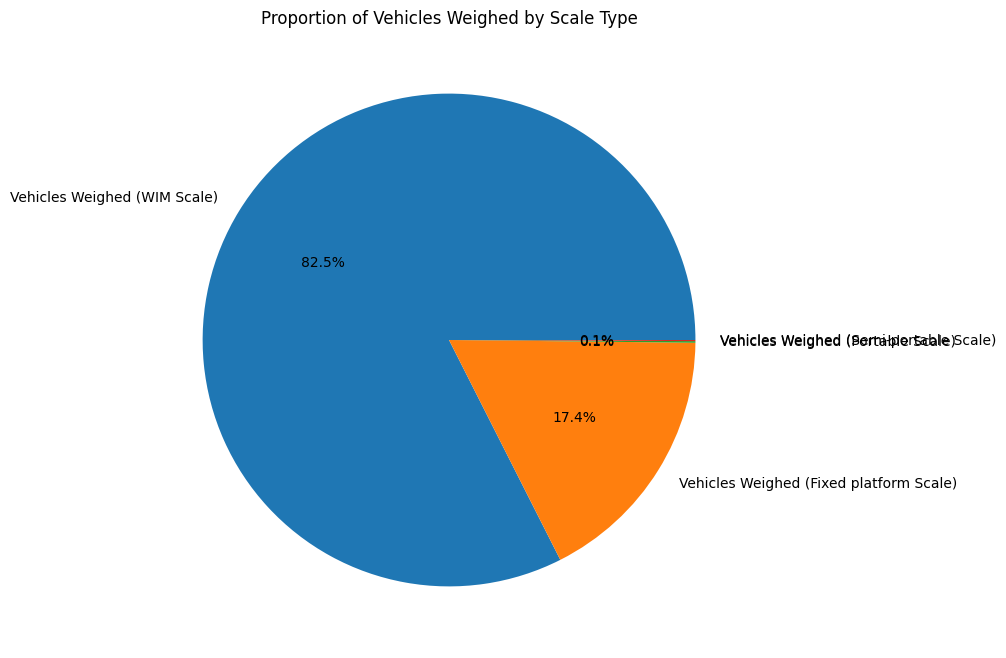

In [58]:
# Pie chart of scale type usage
total_scale_usage.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    figsize=(8, 8), 
    title='Proportion of Vehicles Weighed by Scale Type'
)
plt.ylabel('')
plt.show()

> **2. Line Plot: Visualize Trends**

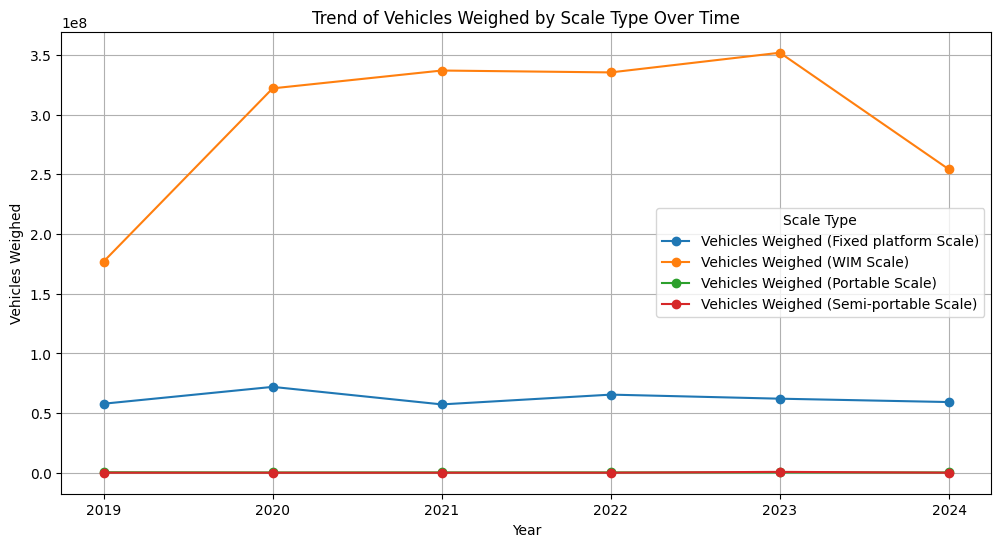

In [59]:
yearly_scales.plot(
    kind='line',
    marker='o',
    figsize=(12,6),
    title='Trend of Vehicles Weighed by Scale Type Over Time'
)
plt.xlabel('Year')
plt.ylabel('Vehicles Weighed')
plt.grid(True)
plt.legend(title='Scale Type')
plt.show()

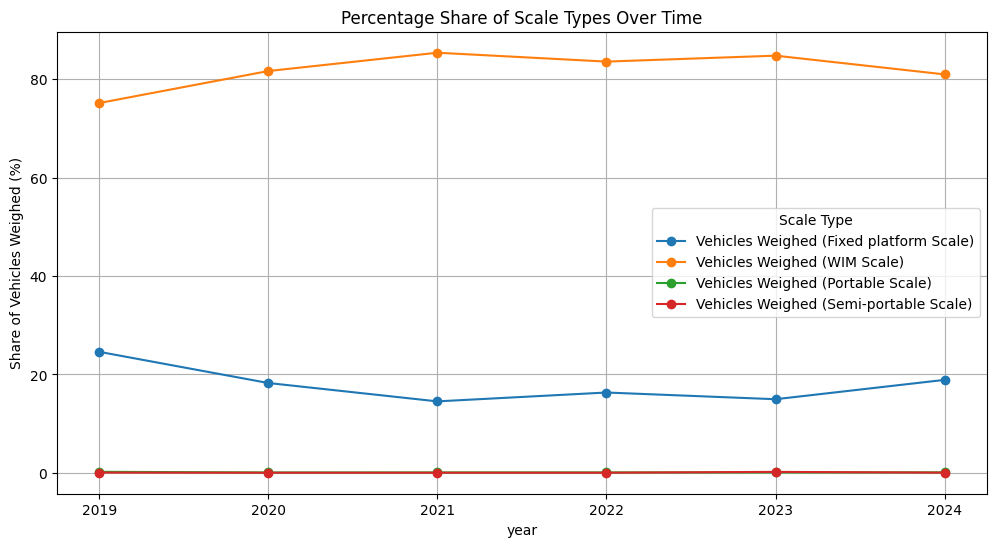

In [65]:
# Convert to percentage of total vehicles weighed each year
scale_pct = yearly_scales.div(yearly_scales.sum(axis=1), axis=0) * 100

# Plot percentage share over time
scale_pct.plot(
    kind='line',
    marker='o',
    figsize=(12,6),
    title='Percentage Share of Scale Types Over Time'
)
plt.ylabel('Share of Vehicles Weighed (%)')
plt.grid(True)
plt.legend(title='Scale Type')
plt.show()

## Number of vehicles weighed over time

In [66]:
scale_cols = [
    'Vehicles Weighed (Fixed platform Scale)',
    'Vehicles Weighed (WIM Scale)',
    'Vehicles Weighed (Portable Scale)',
    'Vehicles Weighed (Semi-portable Scale)'
]

In [68]:
# Group by year
yearly_scales = df.groupby('year')[scale_cols].sum()
yearly_scales

,Vehicles Weighed (Fixed platform Scale),Vehicles Weighed (WIM Scale),Vehicles Weighed (Portable Scale),Vehicles Weighed (Semi-portable Scale)
year,,,,
2019,57912712.0,176930530.0,516631.0,153909.0
2020,72023918.0,322024662.0,338867.0,128907.0
2021,57345324.0,336963712.0,370479.0,136691.0
2022,65534341.0,335390835.0,380428.0,150857.0
2023,62126510.0,351874615.0,350017.0,839301.0
2024,59314615.0,254136436.0,344452.0,162334.0


## 2. Line Plot: Trends Over Time

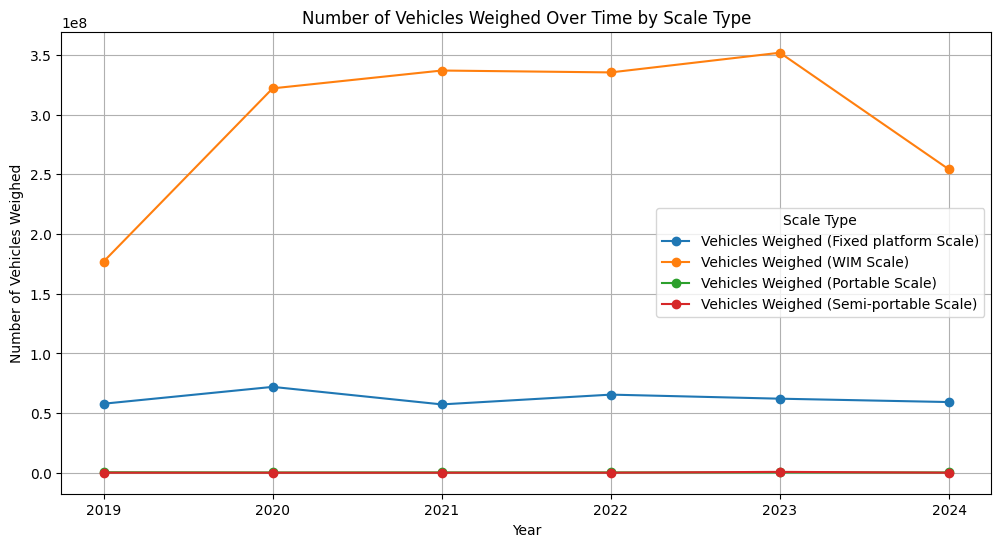

In [69]:
# Line plot for each scale type
yearly_scales.plot(
    kind='line',
    marker='o',
    figsize=(12,6),
    title='Number of Vehicles Weighed Over Time by Scale Type'
)
plt.xlabel('Year')
plt.ylabel('Number of Vehicles Weighed')
plt.grid(True)
plt.legend(title='Scale Type')
plt.show()

# 5. State-Level Analysis

## 🔝 Top states by:
- **Oversize violations**

In [70]:
5. State-Level Analysis
🔝 Top states by:

Oversize violations

Overweight violations

Permits issued

SyntaxError: invalid character '🔝' (U+1F51D) (1555734874.py, line 2)

### 1. Group and Summarize by State

In [74]:
# Group by state and sum oversize violations
oversize_by_state = df.groupby('State')['oversize_violation_current_year'].sum().sort_values(ascending=False)

# Display top 10 for preview
pd.DataFrame(oversize_by_state.head(10))

,oversize_violation_current_year
State,
FL,60952.0
CA,55290.0
SC,10688.0
WA,10265.0
NE,9840.0
AR,7359.0
CO,6069.0
OK,5735.0
KY,5707.0


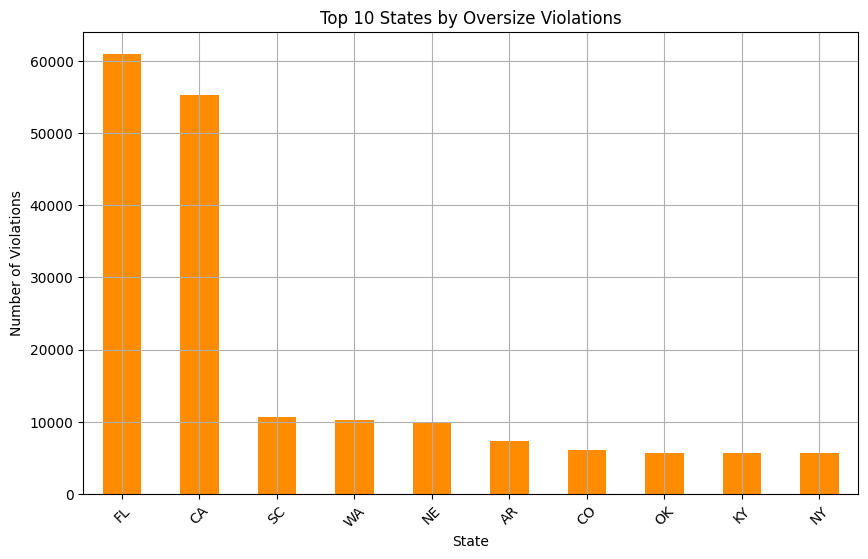

In [75]:
# Plot top 10 states
oversize_by_state.head(10).plot(
    kind='bar',
    figsize=(10,6),
    color='darkorange',
    title='Top 10 States by Oversize Violations'
)
plt.ylabel('Number of Violations')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

- Which states have the highest or lowest oversize violations?
    - **Florida and California** are highest records of oversize violations.
- Do **high-traffic** or industrial states report more oversize issues?
    - **California** report more oversize issues.

#### Can be combined with permit issuance to calculate compliance rate.

In [76]:
# Create total oversize permits
df['oversize_permits'] = df['non_divisible_trip_permits'] + df['non_divisible_annual_permits']

# Group by state
compliance_df = df.groupby('State')[['oversize_permits', 'oversize_violation_current_year']].sum()

# Calculate compliance rate
compliance_df['compliance_rate_%'] = ((compliance_df['oversize_permits'] - compliance_df['oversize_violation_current_year']) / compliance_df['oversize_permits']) * 100

# Handle division by zero or negative cases safely
compliance_df = compliance_df.replace([float('inf'), -float('inf')], None).dropna()

In [79]:
# Sort by lowest compliance (worst compliance first)
pd.DataFrame(compliance_df.sort_values('compliance_rate_%').head(10))

,oversize_permits,oversize_violation_current_year,compliance_rate_%
State,,,
PR,290.0,31.0,89.310345
FL,585308.0,60952.0,89.586337
CA,996914.0,55290.0,94.453885
CO,166992.0,6069.0,96.365694
MT,126706.0,2870.0,97.734914
SC,491580.0,10688.0,97.825786
WI,189494.0,3722.0,98.035822
WA,547970.0,10265.0,98.126722
NE,587915.0,9840.0,98.326289


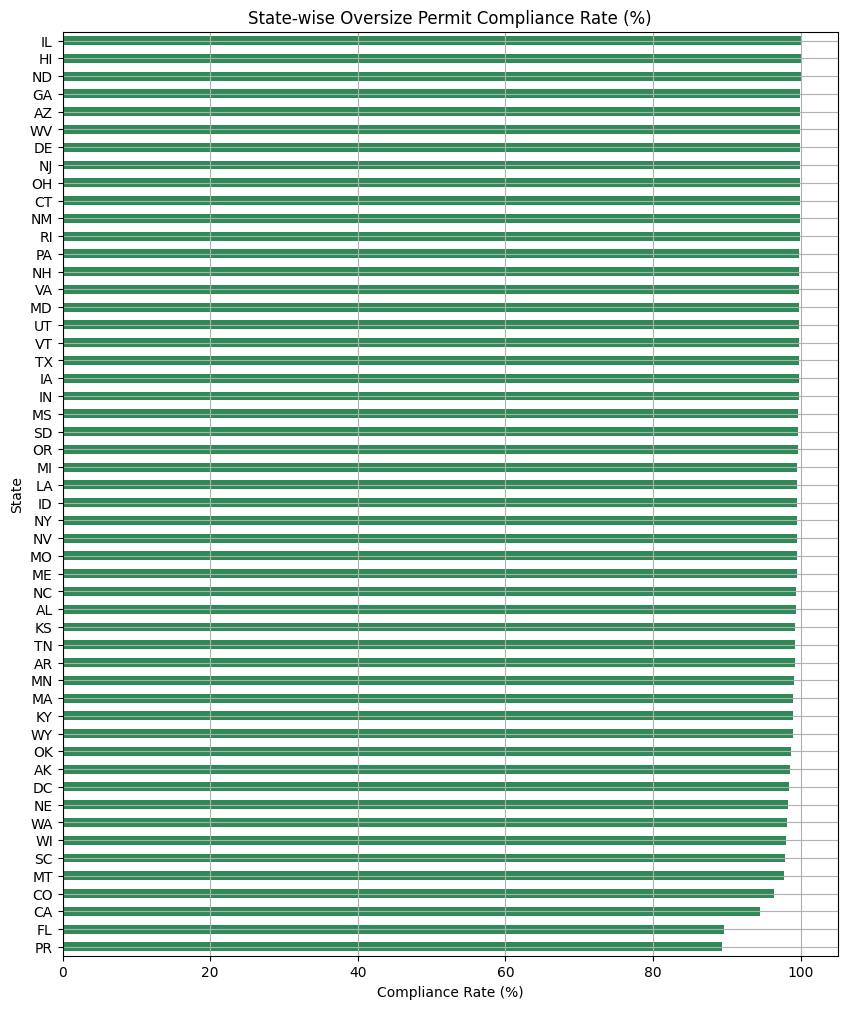

In [80]:
# Sort by compliance rate
compliance_df_sorted = compliance_df.sort_values('compliance_rate_%')

# Plot
compliance_df_sorted['compliance_rate_%'].plot(
    kind='barh',
    figsize=(10,12),
    color='seagreen',
    title='State-wise Oversize Permit Compliance Rate (%)'
)
plt.xlabel('Compliance Rate (%)')
plt.grid(True)
plt.show()


- State like **Florida and Puerto Rico** has lowest Compliance Rate(%) between 85% to 95%.
- Next are the **California, Colorado, Montana, South Carolina, Washington, Nebraska and Wisconsin** are having **Compliance Rate(%) above 95%**.

> **Year-over-year change in compliance**

In [82]:
df['oversize_permits'] = df['non_divisible_trip_permits'] + df['non_divisible_annual_permits']

# Group by year
compliance_by_year = df.groupby('year')[['oversize_permits', 'oversize_violation_current_year']].sum()

# Compute compliance rate
compliance_by_year['compliance_rate_%'] = (
    (compliance_by_year['oversize_permits'] - compliance_by_year['oversize_violation_current_year']) / 
    compliance_by_year['oversize_permits']
) * 100

In [84]:
# Calculate YoY percentage change
compliance_by_year['YoY_change_%'] = compliance_by_year['compliance_rate_%'].pct_change() * 100

pd.DataFrame(compliance_by_year[['compliance_rate_%', 'YoY_change_%']])

,compliance_rate_%,YoY_change_%
year,,
2019,98.891606,NaN
2020,99.227706,0.339867
2021,99.198934,-0.028995
2022,99.212324,0.013497
2023,99.190647,-0.021849
2024,99.242382,0.052158


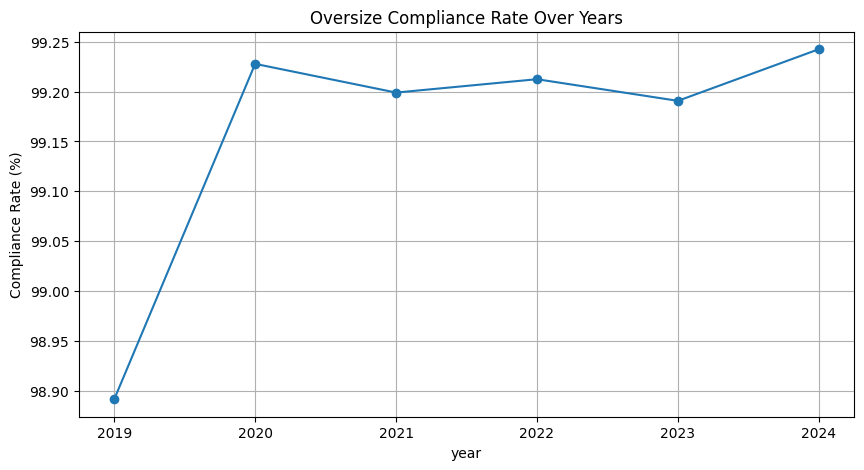

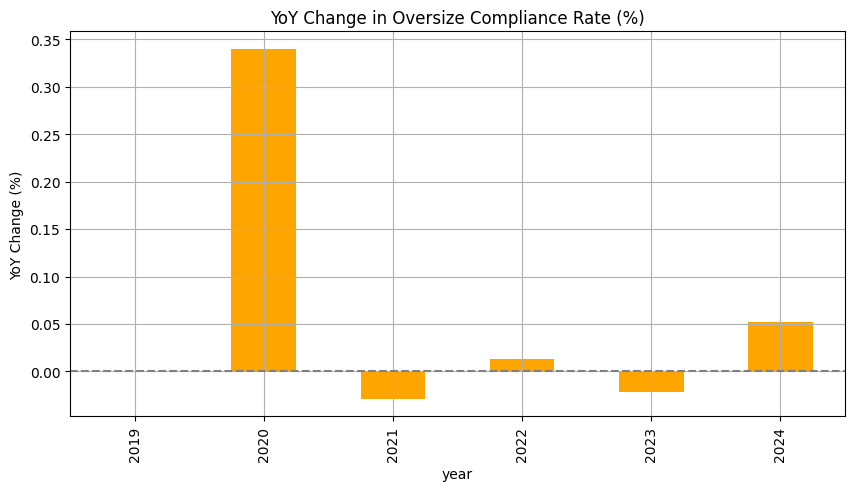

In [86]:
# Line chart: compliance rate
compliance_by_year['compliance_rate_%'].plot(
    marker='o', figsize=(10,5), title='Oversize Compliance Rate Over Years'
)
plt.ylabel('Compliance Rate (%)')
plt.grid(True)
plt.show()

# Bar chart: year-over-year change
compliance_by_year['YoY_change_%'].plot(
    kind='bar', figsize=(10,5), color='orange', title='YoY Change in Oversize Compliance Rate (%)'
)
plt.ylabel('YoY Change (%)')
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.show()
